Regression functions

In [18]:
import numpy as np
import pandas as pd
from math import sqrt
from numpy import linalg
import scipy.stats as stats
import matplotlib.pyplot as plt
# Global parameters for plt graphics
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = [10,6]


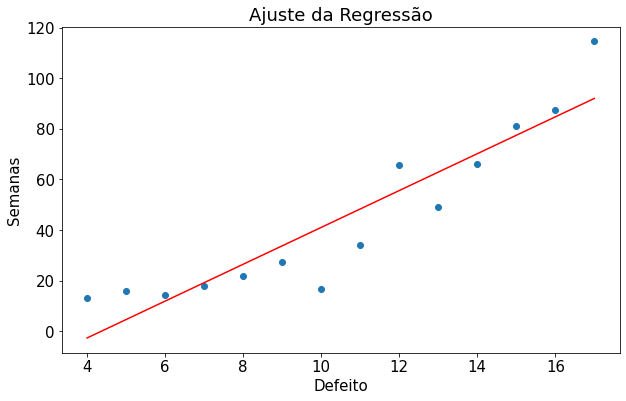

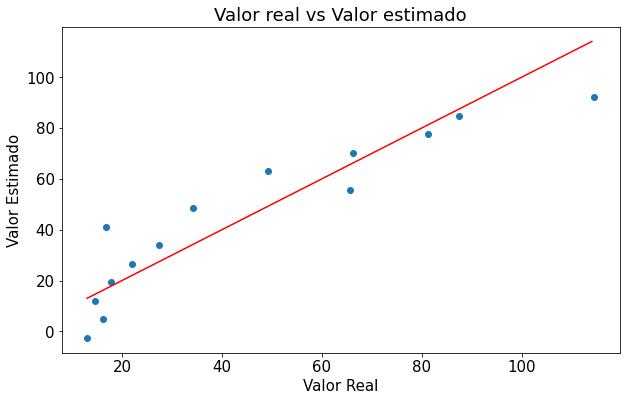

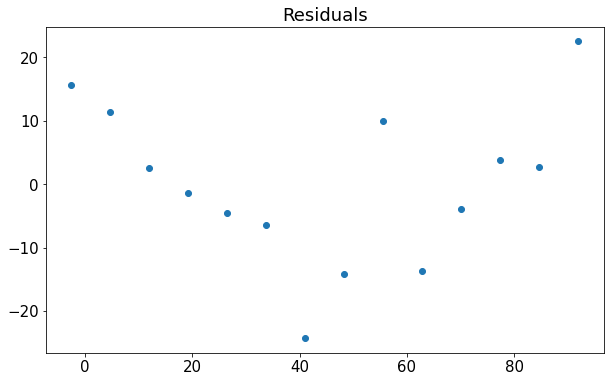

,residuals,hat_diag,standarized,studentized,studen_ext
0,15.59,0.26,1.19,1.19,1.43
1,11.41,0.20,0.87,0.87,0.97
2,2.54,0.16,0.19,0.19,0.20
3,-1.44,0.13,-0.11,-0.11,-0.11
4,-4.52,0.10,-0.34,-0.35,-0.35
5,-6.39,0.08,-0.49,-0.49,-0.49
6,-24.27,0.07,-1.85,-1.86,-2.18
7,-14.15,0.07,-1.08,-1.08,-1.13
8,9.98,0.08,0.76,0.76,0.78
9,-13.70,0.10,-1.04,-1.05,-1.11


In [39]:
class Linear_Regression:
    """Ordnary least Square regression"""
    def __init__(self):
        # fit attributes
        self._fit = False
        self.y = None
        self.X = None
        self.constant = False
        self.p = None
        self.n = None
        
        # estimation attributes
        self.hat_matrix = None
        self.betas = None
        self.y_hat = None
       
        # Residual analysis attributes
        self.res = None
        self.QMres = None
        self.res_std = None
        self.hat_diag = None
        self.res_stdt = None
        self.res_stdte = None
        self.S2 = None
        self.res_analysis = None
        
    def __str__(self):
        s  = f'Betas:\n {np.round(self.betas,2)}\n'
        return s 
        
    def fit(self, y, X, add_constant = True):
        """Set the variables and returns the estimation"""
        self.y = y
        
        # if simple linear regression and X is unidimension
        # adjusts X shape to bidimensional
        if len(X.shape) == 1:
            X = np.reshape(X,newshape = (len(X),1))
        
        # adds the constant column if True
        if add_constant == True:
            self.contant = True
            self.X = np.append(np.ones((X.shape[0], 1)), X, axis = 1)
        else:
            self.X = X
        # n is the number of observations and is the number of rows in the X matrix
        self.n = X.shape[0]
        # P is the number of regressors and is the number of columns in the X matrix
        self.p = X.shape[1]
            
        return self._estimation()
        
    def _estimation(self):
        """Runs the estimation"""
        
        # semi hat matrix, is useful because can give us the hat matrix
        # and the beta estimations
        self._XX = linalg.inv(self.X.T @ self.X) @ self.X.T
        
        # the semi hat multiplied by right with the y vector returns the beta estimations
        self.betas =  self._XX @ self.y
        
        # the semi hat multiplied by left with the X matrix returns the hat matrix
        # the hat matrix maps the vector of observed independent variables
        # to a vector of estimations of the dependent variable
        self.hat_matrix = self.X @ self._XX
        
        # estimating observations
        self.y_hat = self.hat_matrix @ self.y
        # estimating the residuals
        self.res = self.y - self.y_hat
        self.res = self.res.reshape((self.n,1))
        
        # changing the fit flag
        self._fit = True
        
        return self.betas
        
        
    def residual_analysis(self):
        '''residual analysis'''
        # h: hat_diag is the diagonal of X matrix
        self.hat_diag = np.diagonal(self.hat_matrix).reshape((self.n,1))
        
        # d: res_std standirized residuals
        self.QMres = (self.res**2).sum()/(self.n - self.p-1)
        self.res_std = self.res / self.QMres**(1/2)
        

        # r: res_stdt is the studentized residuals
        self.res_stdt = self.res / (((self.QMres - (1-self.hat_diag))**(1/2)).reshape((self.n,1)))
        
        
        # S2: S2 is the model variance without the ith observation
        # t: res_stdte studentized residuals exterior, considers S2 and standart deviation item by item
        self.S2 = ((self.n- self.p)*self.QMres - (self.res**2 / (1 - self.hat_diag))) / (self.n-self.p-1)
        self.res_stdte = self.res / (self.S2*(1-self.hat_diag))**(1/2)
        
        # residual analysis data frame
        self.res_analysis = np.concatenate([self.res,self.hat_diag,self.res_std,self.res_stdt,self.res_stdte], axis = 1)
        self.res_analysis = pd.DataFrame(self.res_analysis, 
                                         columns = ['residuals', 'hat_diag', 'standarized', 'studentized', 'studen_ext'])
        return self.res_analysis.round(4)
        

df = pd.read_csv(r'garrafas.csv', sep =';')
y = df.loc[:,['defeitos']].to_numpy()
X = df.loc[:,['semanas']].to_numpy()

model = Linear_Regression()
model.fit(y = y, X = X, add_constant = True)
model.residual_analysis()


# plt.scatter(X,y, label = 'Real Data');
# plt.plot(X,model.y_hat, color = 'red')
# plt.title('Ajuste da Regressão')
# plt.xlabel('Defeito')
# plt.ylabel('Semanas')
# plt.show()


plt.scatter(model.y,model.y_hat);
line = np.arange(model.y.min(),model.y.max())
plt.plot(line,line, color = 'red')
plt.title('Valor real vs Valor estimado')
plt.xlabel('Valor Real')
plt.ylabel('Valor Estimado')
plt.show()

plt.scatter(model.y_hat,model.res)
plt.title('Residuals');
plt.show()
model.res_analysis.round(2)

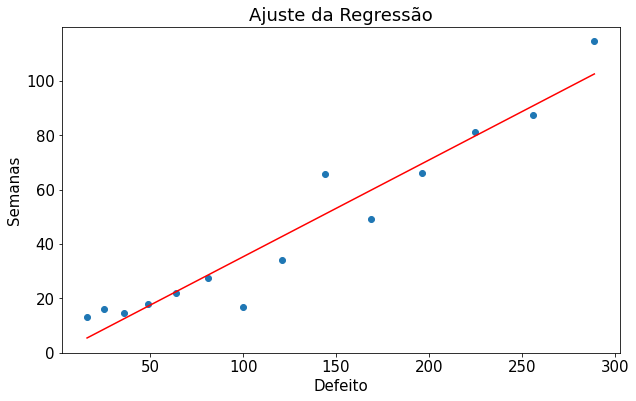

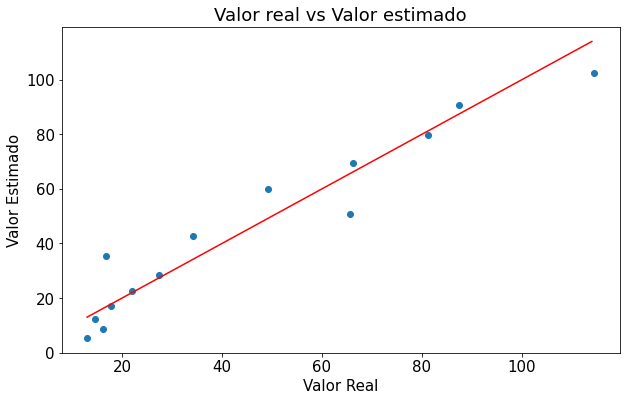

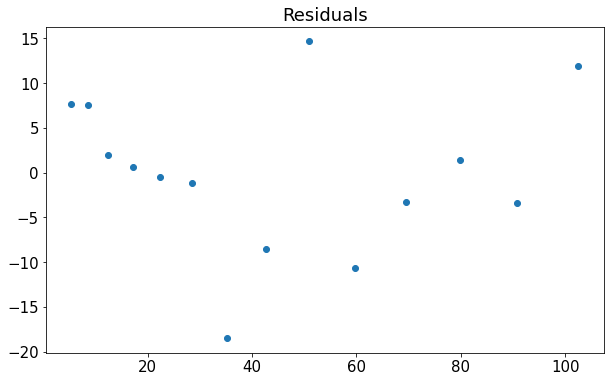

,residuals,hat_diag,standarized,studentized,studen_ext
0,7.62,0.19,0.82,0.83,0.91
1,7.52,0.17,0.81,0.82,0.88
2,2.00,0.15,0.22,0.22,0.23
3,0.68,0.13,0.07,0.07,0.08
4,-0.46,0.11,-0.05,-0.05,-0.05
5,-1.11,0.09,-0.12,-0.12,-0.12
6,-18.48,0.08,-1.99,-2.00,-2.44
7,-8.55,0.07,-0.92,-0.93,-0.95
8,14.66,0.07,1.58,1.59,1.78
9,-10.63,0.09,-1.15,-1.15,-1.23


In [41]:
df = pd.read_csv(r'garrafas.csv', sep =';')
y = df.loc[:,['defeitos']].to_numpy()
X = df.loc[:,['semanas']].to_numpy()
X = X**2

model = Linear_Regression()
model.fit(y = y, X = X, add_constant = True)
model.residual_analysis()


plt.scatter(X,y, label = 'Real Data');
plt.plot(X,model.y_hat, color = 'red')
plt.title('Ajuste da Regressão')
plt.xlabel('Defeito')
plt.ylabel('Semanas')
plt.show()


plt.scatter(model.y,model.y_hat);
line = np.arange(model.y.min(),model.y.max())
plt.plot(line,line, color = 'red')
plt.title('Valor real vs Valor estimado')
plt.xlabel('Valor Real')
plt.ylabel('Valor Estimado')
plt.show()

plt.scatter(model.y_hat,model.res)
plt.title('Residuals');
plt.show()
model.res_analysis.round(2)
